In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# CSV 파일 불러오기

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/user/Desktop/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [29]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [30]:
# 데이터 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [31]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Rings')

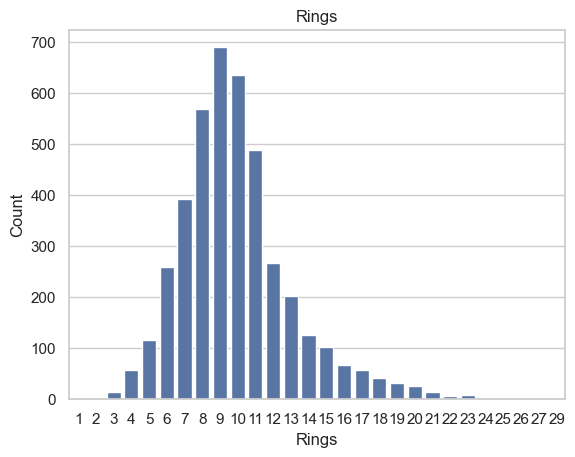

In [32]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [33]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [34]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [35]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_11620\1474768853.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
C:\Users\user\AppData\Local\Temp\ipykernel_11620\1474768853.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Diameter'],

<Axes: xlabel='Diameter', ylabel='Density'>

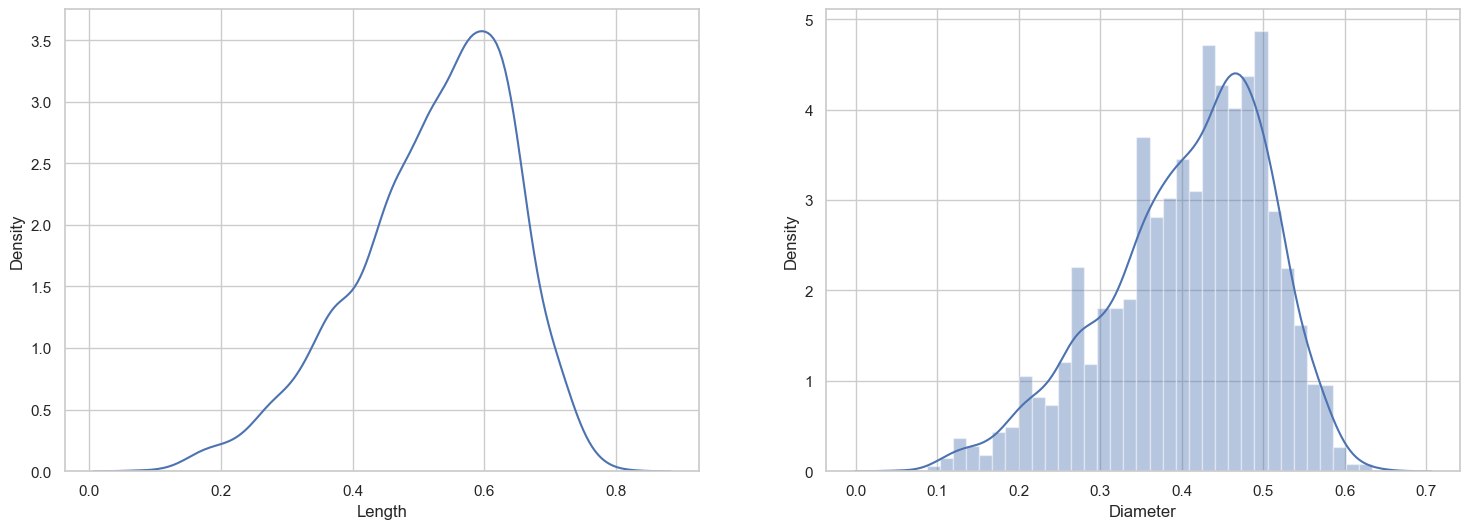

In [36]:
# 컬럼별 히스토그램 확인


figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Diameter'], ax=ax2)

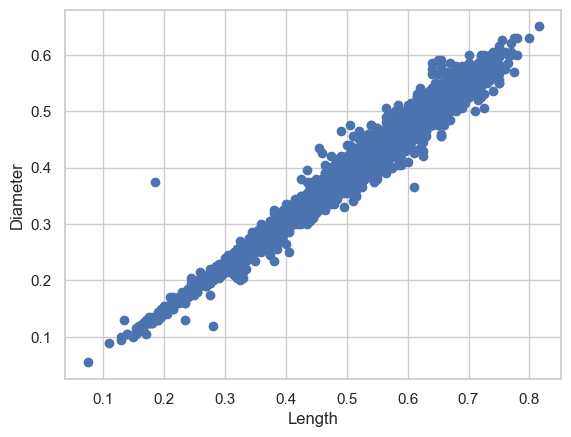

In [37]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Length'], df['Diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')

plt.show()

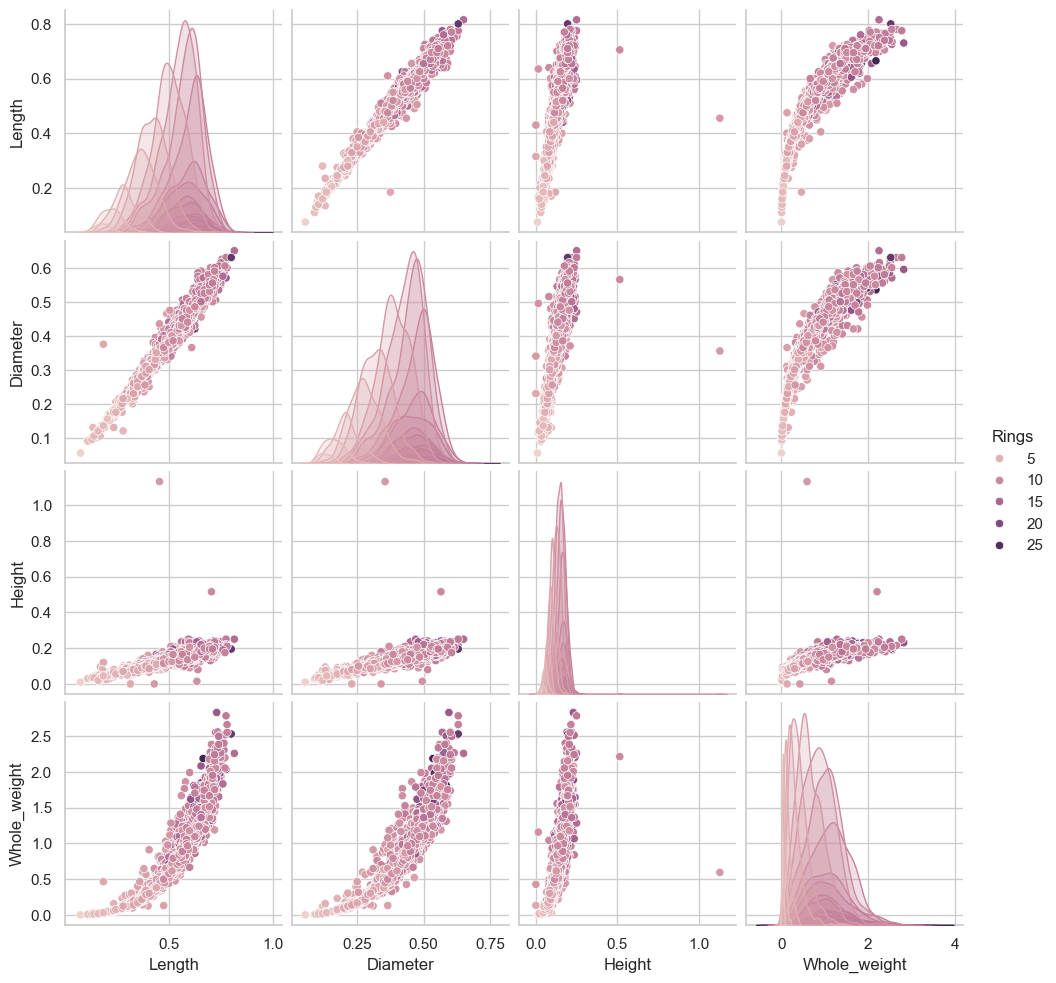

In [38]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Length', 'Diameter', 'Height', 'Whole_weight'],
            hue ='Rings')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11620\1214122606.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Length", data=df, palette="Set3")


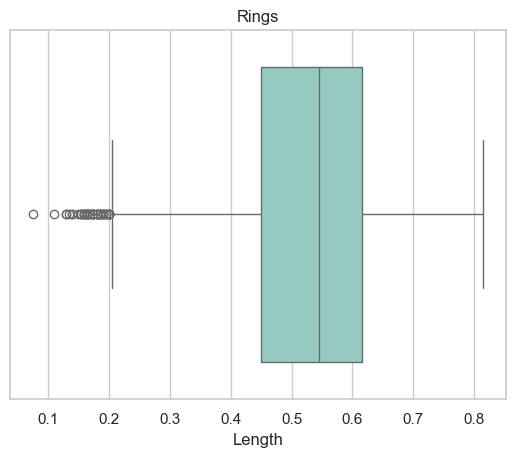

In [39]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Length", data=df, palette="Set3")
plt.title("Rings")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11620\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


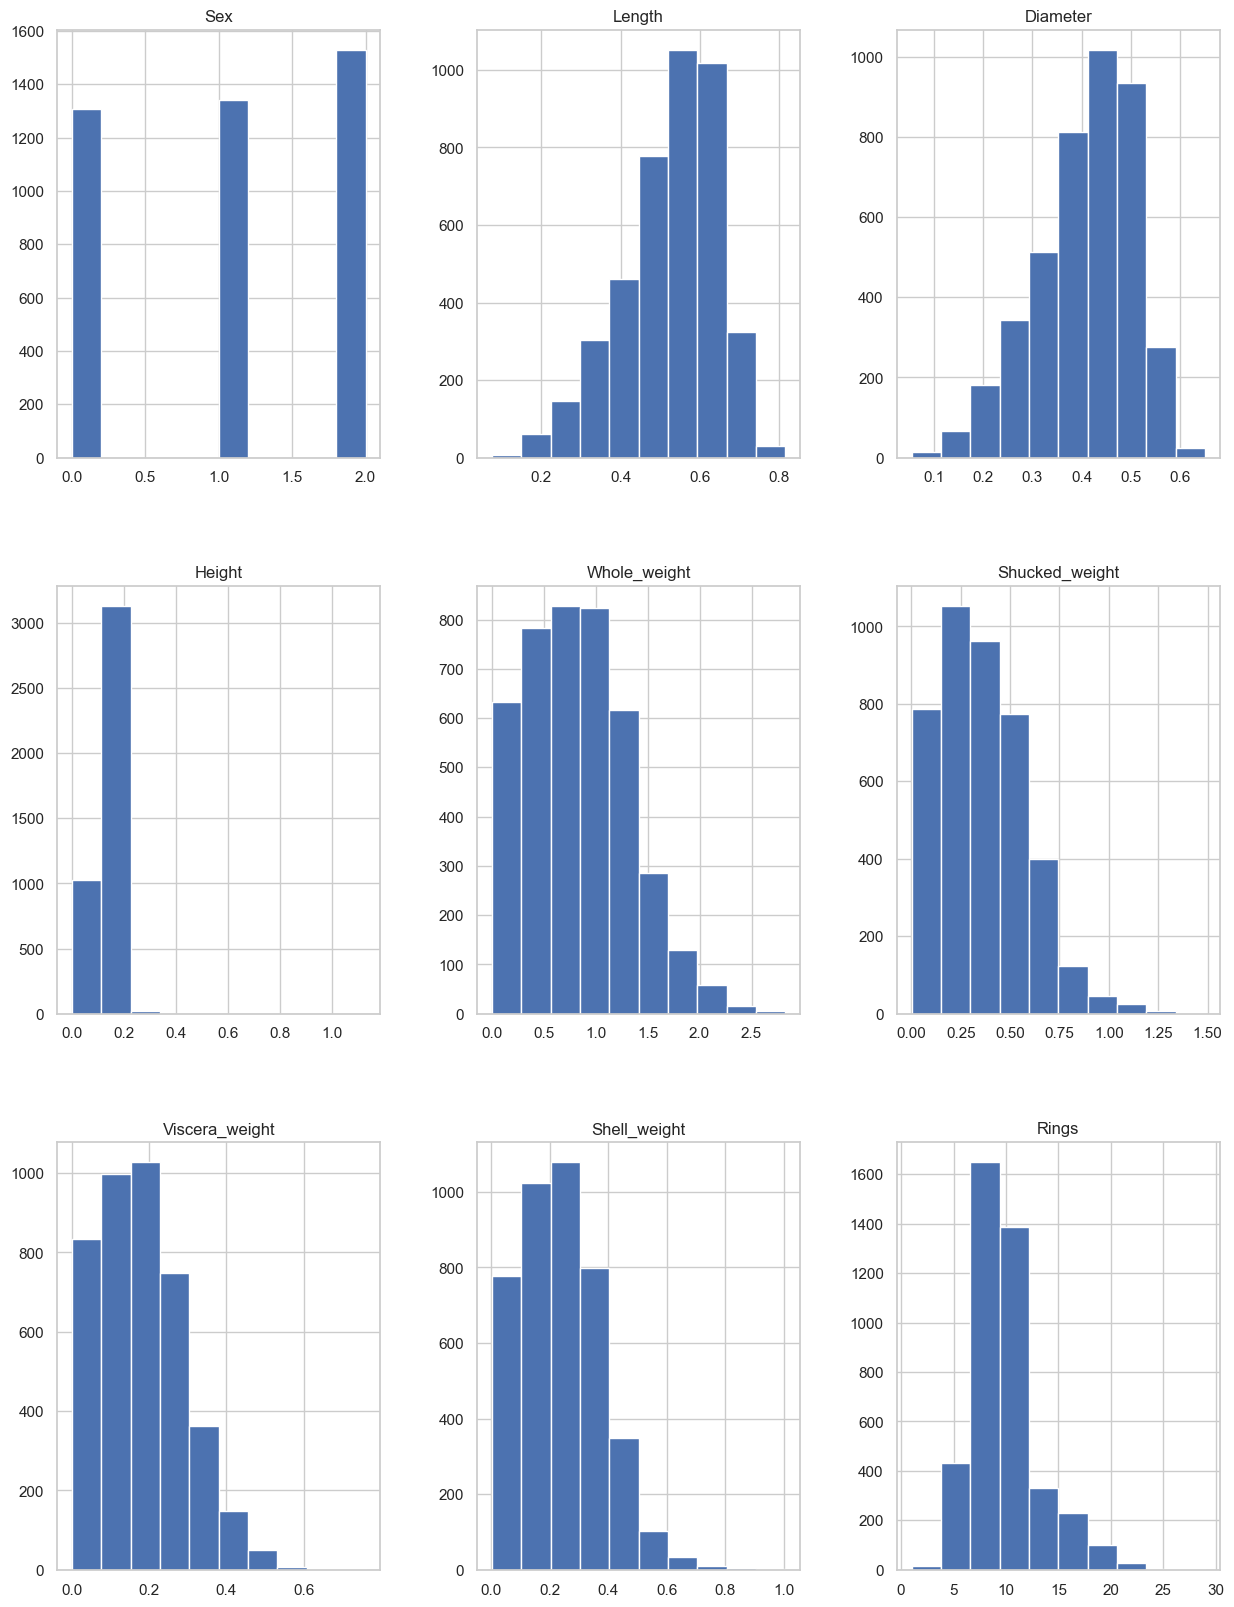

In [40]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [41]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [42]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [43]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [44]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [47]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.24784688995215312
[[ 0  4  0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0 28  4  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 29 19  5  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26 30 21 35  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 10 56 59  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 30 82 32  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2 15 64 40 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2 14 42 42 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  4 38 36 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 19 16 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 15 10  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  6 13  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 

In [48]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.24784688995215312
[[ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 31  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19 30  9  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10 41 41 20  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 14 52 59  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 20 85 35  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 11 17 49 39 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 16 35 41 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  9 28 37 16  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  7  7 20 14  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4 11 13  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6 11  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0

C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.2555023923444976
[[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 11 18  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7 30 13  8  2  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 27 28 45  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  6 12 67 41 10  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  9 31 63 44  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 18 45 43 21  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 10 30 54 17  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  5 25 39 16  0  4  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  2 25 14  0  4  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  6 15  3  0  5  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  9  5  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0

C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:

# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.18181818181818182
[[ 1  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  5  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  6 11  7  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7 12 23 10  2  2  1  2  1  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  3 16 37 33 14  3  4  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 10 25 30 37 14 11  3  4  1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 11 28 41 30 13  7  7  1  4  4  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 14 34 24 19 15 11  3  4  4  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  2  3 10 21 35 15  9 11  3  1  1  5  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  9 20 19 11  9  9  3  3  0  0  1  2  1  0  2  2  0  0  0]
 [ 0  0  0  0  1  5  4  9  9  6  6  2  1  2  1  1  2  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  2  3  2  6  5  5  2  1  2  1  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6  3  2  1  1  4  0  2  1

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.22679425837320574
[[ 0  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10 13 12  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  8 19 21 10  1  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 29 31 37  7  5  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  6 19 52 39 15  3  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8 34 42 43 16  4  1  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  5 11 37 40 29  6  5  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  8 34 40 22  2  7  3  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  4 21 36 14  5  5  1  0  1  0  0  1  0  0  0  1  0  1  0]
 [ 0  0  0  0  1  4  9 10 14  5  3  1  0  0  2  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5 11  8  1  0  3  2  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  4  7  3  2  2  0  0  1  0  0  0  0